Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Alexander Myza"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
import sympy as sp
from scipy.linalg import solve
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    i = 0
    x_1 = x0
    x_2 = x0 + 2 * eps
    while abs(x_1 - x_2) >= eps and i < maxiter:
        x_2 = x_1
        x_1 = x_2 - f(x_2) / fder(x_2)
        i += 1
    x, z = float(x_1), i
    return x, z

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

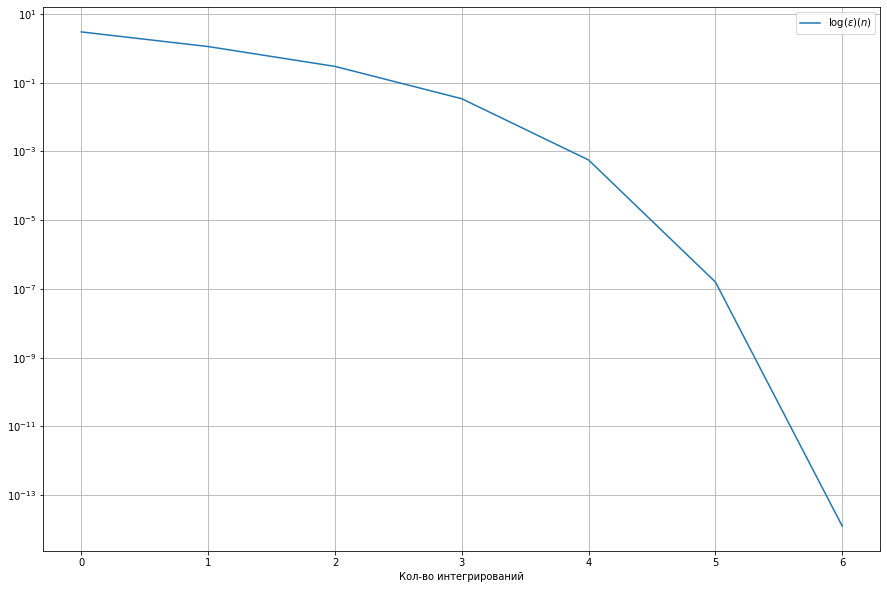

In [5]:
_, m_nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
xx = []
nit = []
for i in range(0, m_nit + 1):
  v_xx, v_nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4, maxiter=i)
  xx.append(v_xx)
  nit.append(v_nit)
plt.figure(figsize=(15, 10))
plt.plot(nit, np.array(xx) - 1, label=r'$\log(\varepsilon)(n)$')
plt.yscale('log')
plt.legend()
plt.xlabel("Кол-во интегрирований")
plt.grid()
# второй порядок сходимости(квадратичная)

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [6]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    i = 0
    x_1 = x0
    x_2 = x0 + 2 * eps
    while abs(x_1 - x_2) >= eps and i < maxiter:
        x_2 = x_1
        x_1 = x_2 - m * f(x_2) / fder(x_2)
        i += 1
    x, it = float(x_1), i
    return x, it

In [7]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [8]:
f = lambda x: (x ** 2 - 1) ** 2
f_der = lambda x: 2 * (x ** 2 - 1) * 2 * x
m_list = np.arange(1, 7)
nit_list = []
for m in m_list:
  xx, nit = mod_newton(f, f_der, x0=2, m=m, maxiter=100)
  print( f'{m}'.center(25), f'{nit}'.center(25),)
# минимальное количество интеграций равно 2 (сходимость квадратична), больше будет линейна

            1                         18           
            2                         5            
            3                         17           
            4                        100           
            5                        100           
            6                        100           


# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


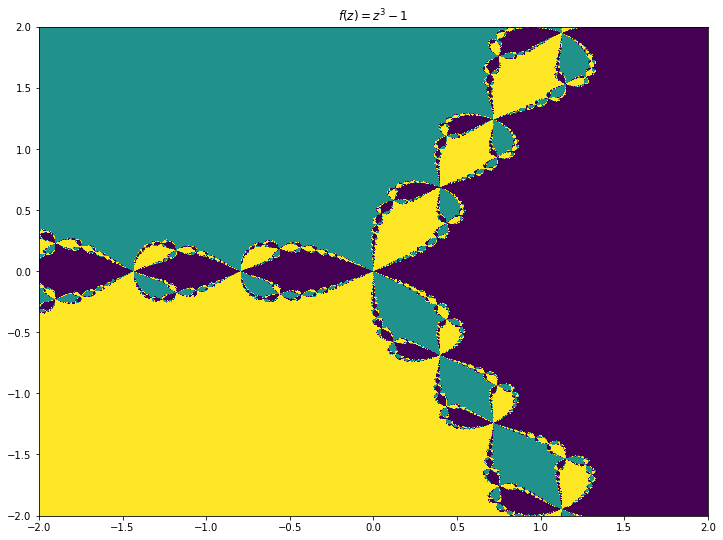

In [18]:
# это код с семинара 
def complex_nwet(f, fder, z0, eps=1e-5, maxiter=100):
    x_1 = z0
    x_n = z0 + 2 * complex(eps, eps)
    i = 0
    while abs(x_1-x_n)>=eps and i<maxiter:
        x_n = x_1
        x_1 = x_n-f(x_n)/fder(x_n)
        i+=1
    return x_1, i
roots=np.exp(np.arange(0, 3) * 2 * np.pi * 1j / 3)
initialReal=np.linspace(-2, 2, 1000)
initialImag=np.linspace(-2, 2, 1000)
XR, YR = np.meshgrid(initialReal,initialImag)
initial = XR + 1j * YR
results = np.zeros_like(initial, dtype=float)
f = lambda z: z ** 3 - 1
df = lambda z: 3 * z ** 2
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        find_root = abs(roots - complex_nwet(f, df, initial[i, j], maxiter=20)[0])
        results[i, j] = np.argmin(find_root)
plt.figure(figsize=(12, 9))
plt.title(r'$f(z) = z^3 - 1$')
h = plt.pcolormesh(XR, YR, results)

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [10]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    i = 0
    x_1 = X0
    x_2 = X0 + 2 * eps
    while np.linalg.norm(x_1 - x_2) >= eps and i < maxiter:
        x_2 = x_1
        dx = solve(jcb(x_2), -F(x_2))
        x_1 = x_2 + dx
        i += 1
    X, z = x_1, i
    return X, z

In [11]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [12]:
from sympy import diff, symbols, lambdify, Matrix
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    x_1, y_2, z_3 = X
    x, y, z = symbols('x y z')
    f1, f2, f3 = func2([x, y, z])
    a = (x, y, z)
    F = Matrix([f1, f2, f3])
    J = F.jacobian([x, y ,z])
    J_f = lambdify(a, J, modules='numpy')
    J_l = J_f(x_1, y_2, z_3)
    
    return J_l

In [13]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [14]:
# more testing in this cell, keep it intact


In [15]:
X = [1, 2, 3]
jac2(X)

array([[2, 4, 6],
       [5, 4, 3],
       [1, 1, 0]])